In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook as tqdm

gold = 8.*np.array([1,1/((1+np.sqrt(5))/2)])

# This function makes the plots look prettier on GitHub. 
### to do: figure out how to make this automatic.

def fix_boxplot(parts):
    for m in parts['fliers']:
        m.set_markersize(12)
        m.set_markeredgewidth(1)
    for b in parts['boxes']:
        b.set_linewidth(2)
    for w in parts['whiskers']:
        w.set_linewidth(2)
    for c in parts['caps']:
        c.set_linewidth(2)
    for m in parts['medians']:
        m.set_linewidth(2)
    for m in parts['means']:
        m.set_linewidth(2)
        m.set_color('g')
        m.set_markerfacecolor('g')

# This function creates the stem and leaf plot
def stem(data,leaf_dig=1):
    sorted_data = data.copy()
    sorted_data.sort()
    stem = (sorted_data // (10**leaf_dig)).astype(int)
    if leaf_dig>0:
        leaf = (sorted_data % (10**leaf_dig)).astype(int)
    else:
        leaf = (sorted_data % (10**leaf_dig) * (10**(1-leaf_dig))).astype(int)
    current_stem = -1
    for s,l in zip(stem,leaf):
        if s != current_stem:
            current_stem = s
            print("\n{0:4d} | ".format(s),end='')
        print("{0} ".format(l),end='')

# Problem 3.4

This problem is essentially identical to 3.3, but with different numbers.

Again, the data values have been changed to my own.

In [2]:
wait_time = np.random.exponential(scale=50.,size=50).astype(int)
wait_time

array([  5,  13,  43,   5,   7,  20,  25, 127, 273,  13,  22, 150,  18,
       108,  23, 159,  62,   6,  34,  36,  33,  46,  36,  35,  19, 107,
        12,  61,  62,  44,  11,   3,   8,   0,  91,   9,   7,  15, 129,
        29, 124,  31, 187,  34,  41,  16,  68,  19, 403,  17])

### Part A

Stem and leaf. Using the first decimal place as the leaf (leaf_dig = 0)

In [3]:
stem(wait_time,1)


   0 | 0 3 5 5 6 7 7 8 9 
   1 | 1 2 3 3 5 6 7 8 9 9 
   2 | 0 2 3 5 9 
   3 | 1 3 4 4 5 6 6 
   4 | 1 3 4 6 
   6 | 1 2 2 8 
   9 | 1 
  10 | 7 8 
  12 | 4 7 9 
  15 | 0 9 
  18 | 7 
  27 | 3 
  40 | 3 

### Part B

Quartiles.

In [4]:
print("Meidan: {0}".format(np.percentile(wait_time,50)))
print("    Q1: {0}".format(np.percentile(wait_time,25)))
print("    Q3: {0}".format(np.percentile(wait_time,75)))

Meidan: 32.0
    Q1: 13.5
    Q3: 62.0


### Part C
Boxplot.

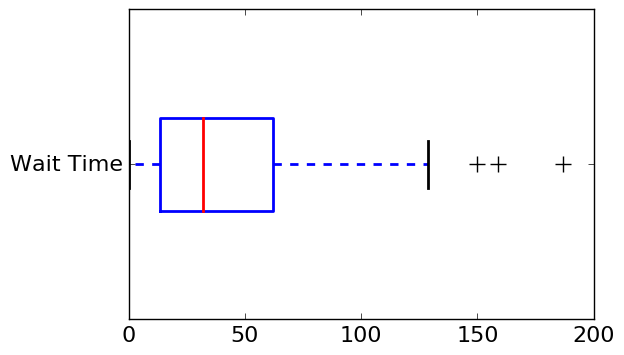

In [5]:
parts = plt.boxplot(wait_time,vert=False,labels=['Wait Time'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axis([0,200,0.75,1.25])
fix_boxplot(parts)

### Part D
Frequency Table.

In [6]:
boundaries = np.array([0,20,40,60,80,100,200])
frequency = np.array([sum((wait_time>boundaries[i]) & (wait_time<=boundaries[i+1])) for i in range(len(boundaries)-1)])
print("    Boundaries\t    Frequency")
print("-"*30)
for i in range(len(boundaries)-1):
    print("{0:5.1f} < x <= {1:.1f}\t{2}".format(boundaries[i],boundaries[i+1],frequency[i]))

    Boundaries	    Frequency
------------------------------
  0.0 < x <= 20.0	19
 20.0 < x <= 40.0	11
 40.0 < x <= 60.0	4
 60.0 < x <= 80.0	4
 80.0 < x <= 100.0	1
100.0 < x <= 200.0	8


### Part E
Histogram.

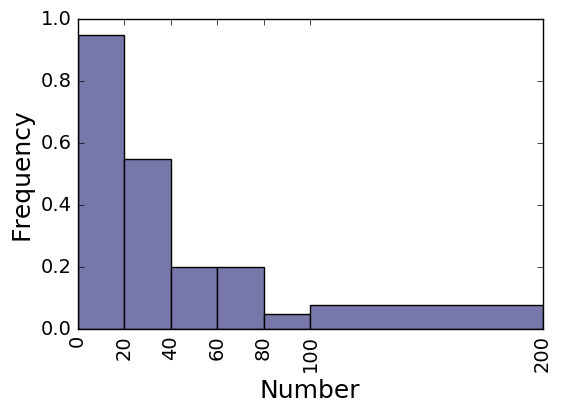

In [7]:
widths = boundaries[1:]-boundaries[:-1]
plt.bar(boundaries[:-1],frequency/widths,width=widths,color="#7777aa")
plt.xticks(boundaries,fontsize=14,rotation='vertical')
plt.yticks(fontsize=14)
plt.xlabel("Number",fontsize=18)
plt.ylabel("Frequency",fontsize=18)

### Part F
Cumulative Frequency.

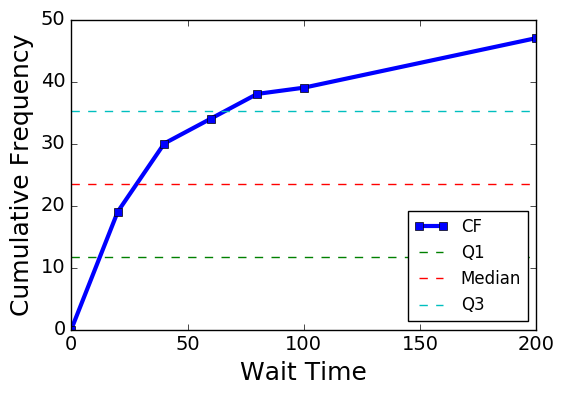

In [8]:
CF = np.cumsum(frequency)
CF.resize(len(CF)+1)
CF = np.roll(CF,1)
plt.plot(boundaries,CF,'-s',linewidth=3,label="CF")
plt.plot([0,200],0.25*sum(frequency)*np.ones(2),'--',label="Q1")
plt.plot([0,200],0.5*sum(frequency)*np.ones(2),'--',label="Median")
plt.plot([0,200],0.75*sum(frequency)*np.ones(2),'--',label="Q3")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Wait Time",fontsize=18)
plt.ylabel("Cumulative Frequency",fontsize=18)
plt.legend(loc='lower right')